# Teacher Salary Analysis

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data
from datetime import datetime, timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Acquire + Prepare

In [2]:
df = read_and_filter_data()

In [3]:
df.head(2).T

,0,1
Fiscal Year,2018,2019
Employee ID,0,0
Hire Date,2011-09-01 00:00:00,2011-09-01 00:00:00
Hire Year,2011,2011
Years of Employment,7,8
Employment Category,6-10,6-10
Salary,71930.0,79005.0
Salary Category,60k-80k,60k-80k
Salary Decrease Flag,0,0
Salary Delta,0.0,9.84


In [4]:
df.tail(2).T

,465866,465867
Fiscal Year,2017,2018
Employee ID,91956,91956
Hire Date,2006-08-31 00:00:00,2006-08-31 00:00:00
Hire Year,2006,2006
Years of Employment,11,12
Employment Category,11-15,11-15
Salary,102196.0,106698.0
Salary Category,100k-120k,100k-120k
Salary Decrease Flag,0,0
Salary Delta,7.65,4.41


In [5]:
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,465868.0,2019.0,2015.0,2017.0,2019.0,2021.0,2023.0,3.0
Hire Date,465868,2005-06-10 17:47:22.394841472,1980-02-01 00:00:00,1999-09-07 00:00:00,2004-12-01 00:00:00,2013-09-03 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,465868.0,2005.0,1980.0,1999.0,2004.0,2013.0,2023.0,9.0
Years of Employment,465868.0,14.0,0.0,7.0,14.0,20.0,43.0,8.0
Salary,465868.0,91674.0,42306.0,77147.0,92087.0,105142.0,148657.0,19359.0
Salary Decrease Flag,465868.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Salary Delta,465868.0,5.0,-45.0,2.0,5.0,7.0,106.0,6.0
Salary Monetary Diff,465868.0,4238.0,-56610.0,2026.0,3612.0,5744.0,58176.0,4667.0


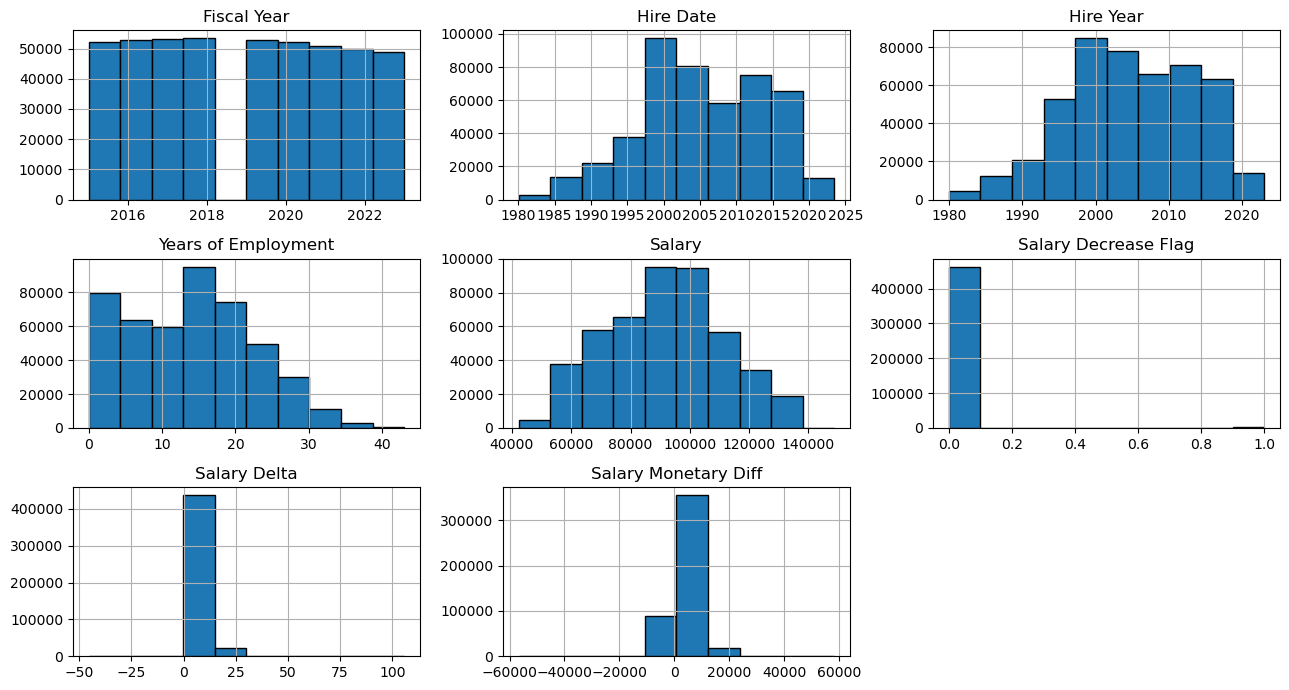

In [6]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

In [7]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
category_cols = df.select_dtypes(exclude='number').columns.to_list()

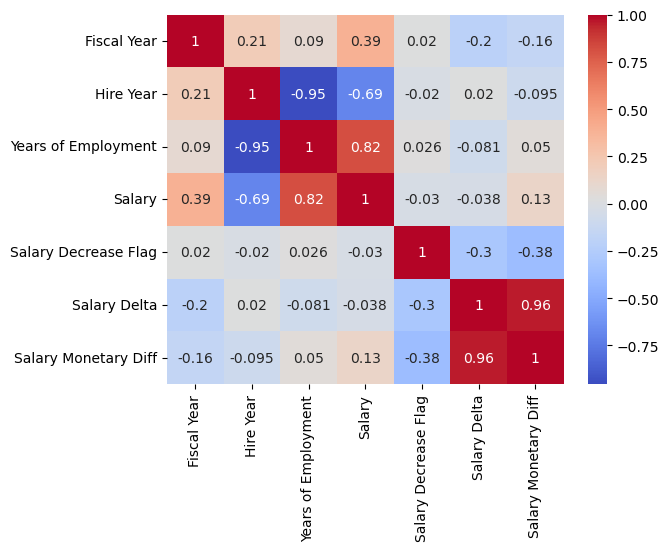

In [8]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm');

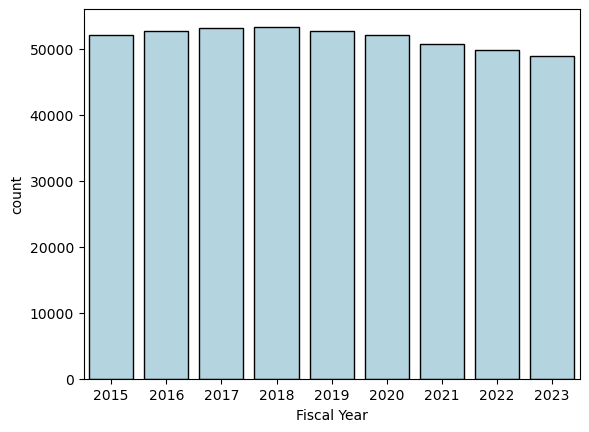

In [9]:
sns.countplot(x=df['Fiscal Year'],color='lightblue',ec='black');

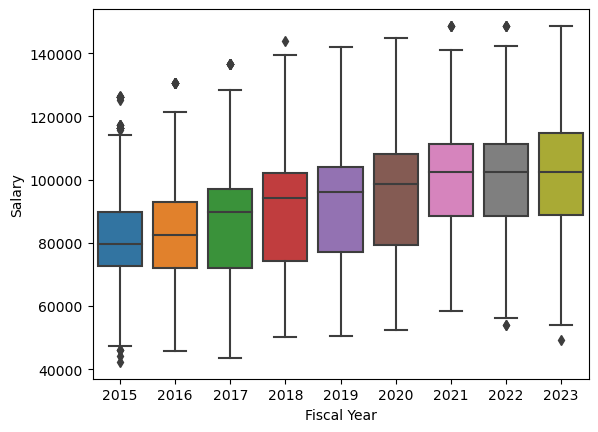

In [10]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

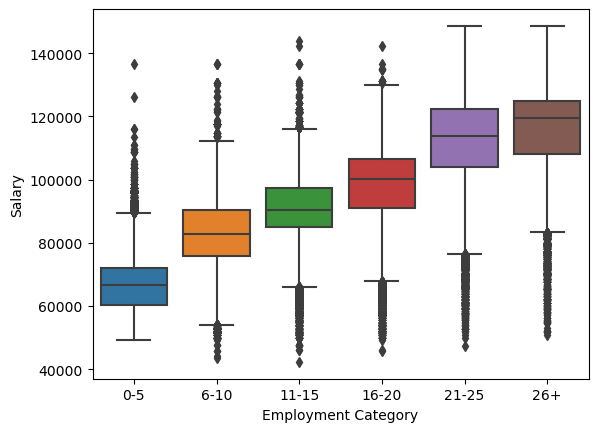

In [11]:
sns.boxplot(data=df, y='Salary', x='Employment Category');

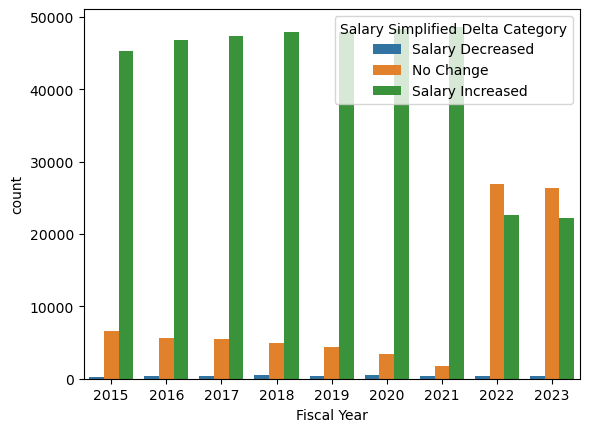

In [12]:
sns.countplot(data=df,
              x='Fiscal Year',
              hue='Salary Simplified Delta Category');

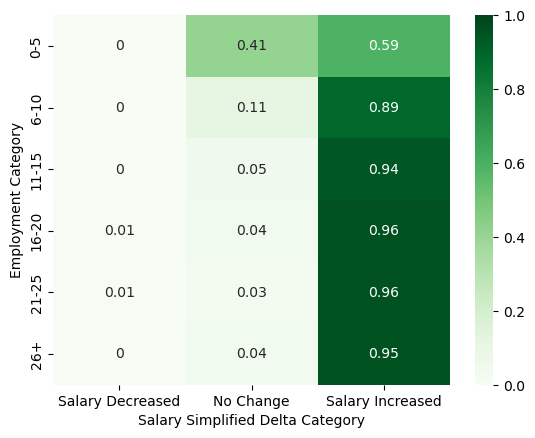

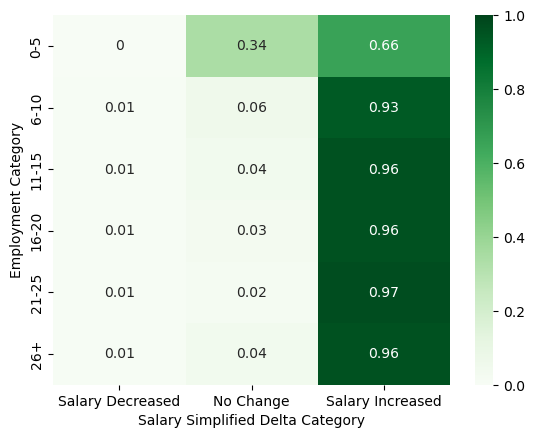

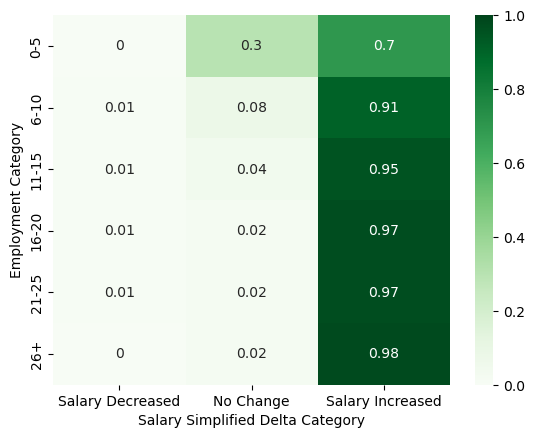

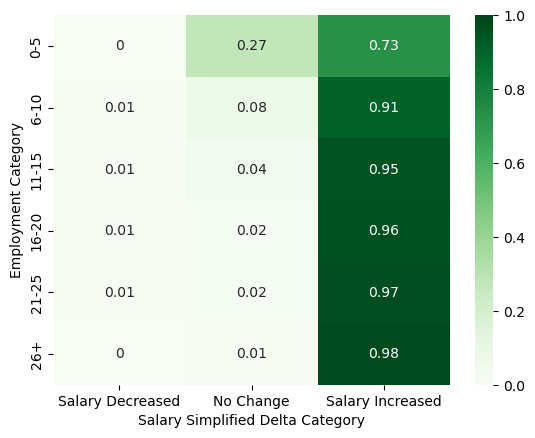

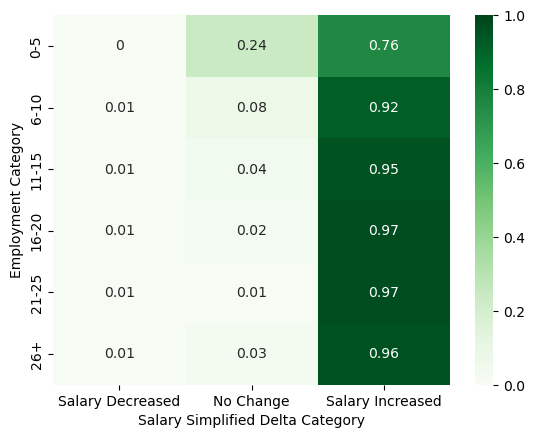

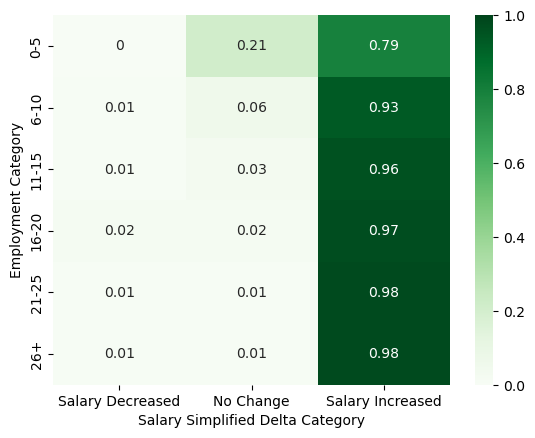

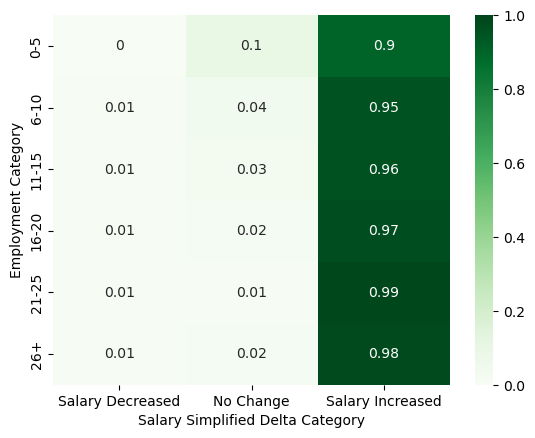

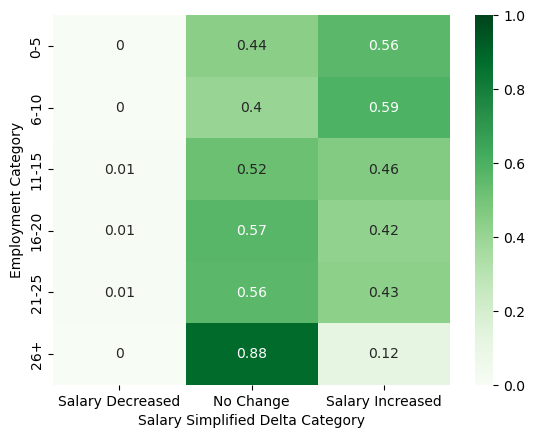

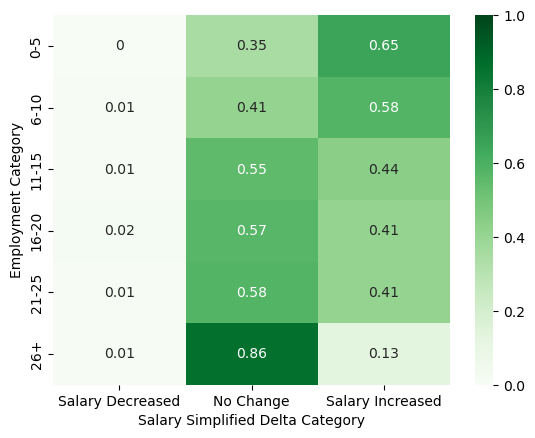

In [13]:
years = range(2015,2024)

for y in years:
    sns.heatmap(pd.crosstab(df[df['Fiscal Year']==y]['Employment Category'],
                            df[df['Fiscal Year']==y]['Salary Simplified Delta Category'],
                            normalize='index').round(2),
                annot=True,
                cmap='Greens',
                vmin=0,
                vmax=1)
    plt.show();

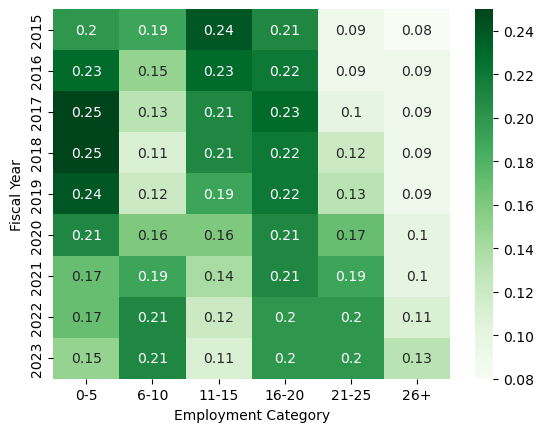

In [14]:
sns.heatmap(pd.crosstab(df['Fiscal Year'],
                       df['Employment Category'],
                       normalize='index').round(2),
            annot=True,
            cmap='Greens');

In [15]:
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# res = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# test = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))